# Assignment XX - K-means Clustering


## Authors
B.W. Holwerda

## Learning Goals
* introduction to a "machine learning" algorithm
* Identifying features in data
* Bimodalities.
* split data into training and test samples
* Hyperparameter input and evaluation.

## Keywords
python, syntax, jupyter notebook, matplotlib, scatter, log plot, scikit-learn, k-means clustering, 

## Companion Content

## Summary
This assignment teaches how to apply the K-means clustering algorithm to real data and evaluate its effectiveness.

<hr>

## Student Name and ID:



## Date:

<hr>

## K-Means Clustering Galaxies with Scikit-learn. 


The properties of galaxies (size, profile, color, stellar mass or star-formation rate) follow a bimodal distribution: there seem to be two classes or groupings with enough spread to blend them together.
Now it is tempting but not a given to assume that these bimodal distributions correspond to each other. For example, blue/red galaxies correspond to disk/spheroidal galaxies. 

To separate out and explore how many clusters these bimodal distribution actually correspond to is an ideal application of K-means clustering:  

K-means clustering 

*k-means clustering is a method (…) that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.*

Following somewhat the example here https://www.machinecurve.com/index.php/2020/04/16/how-to-perform-k-means-clustering-with-python-in-scikit/#full-model-code

And the k-clustering sample from Turner et al: https://ui.adsabs.harvard.edu/abs/2019MNRAS.482..126T

The GAMA data is organized as follows:

 * 0 - GAMA CATAID
 * 1 - Stellar mass (log10 solar masses)
 * 2 - u-r color
 * 3 - S'ersic index (log10)
 * 4 - Half-light radius (log10 kpc)
 * 5 - Specific star formation rate (log10 Gyr^-1)

Please note that all these values are logarithmic! 

In [1]:
# import the sklean stuff we need
import sklearn
from sklearn.preprocessing import scale
# Import the `cluster` module
from sklearn import cluster

# Import matplotlib and numpy of course
import matplotlib.pyplot as plt
import numpy as np
# Import the `pandas` library as `pd`
import pandas as pd


In [2]:
# feature data
gama = pd.read_csv("mstar_ur_n_hlr_ssfr_tl.csv", header=None, names=['gamaid','mstar','u-r','sersicn','r50','ssfr'])


### Exercise 1

Which of the features in the catalog is *not* useful for classification? 

*student answer here*

### Exercise 2

Plot histograms of all of the classification features.

In [1]:
# student work here



### Exercise 3

In the above histograms, can you identify a bimodality in each distribution? What happens if you increase the number of bins? Is each bimodality well-separated or blended?

*student answer here*

### Exercise 4

Plot color against stellar mass. Can you identify blue/red galaxy clusters?

In [2]:
# student work here


### Exercise 5

Plot Sersic index against stellar mass. 

The Sersic index is an indication of how steep the light drops off with radius: n=1 is a disk while n=4 is a spheroidal or elliptical galaxy. Galaxies made of a spheroid and a disk are somewhere in between. 

In [3]:
# student work here


### Exercise 6

Plot specific star formation (ssfr) against stellar mass. 


In [4]:
# student work here


### Exercise 7

How many clusters do you spot in the above plots? HINT: change the alpha of the points to make denser clumps easier to see. 

Is each cluster equally dense and clumped with equal numbers of galaxies in both? 


*student answer here*

### Normalization 

Time to scale (normalize) the data. This is so that the scikit-learn can crunch the numbers. 
First, we need to make a gama_features dataframe with *just* those columns that have the information on the galaxies that define the bimodalities. 

In [5]:
# Import
gama_features = gama[['mstar','u-r','sersicn','r50','ssfr']]

# Apply `scale()` to the `digits` data
data = scale(gama_features)


NameError: name 'gama' is not defined

### Time to split the sample

Best practices is that one splits the sample in a training set and a test set.
This allows one to test independently the results of the the ML algorithm later. 

In [8]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [6]:
# Number of training features
n_samples, n_features = train.shape

# student work here

NameError: name 'train' is not defined

### Exercise 8

How many features are there? How big is the training sample? 

*student answer here*

### K-Means Clustering

This is the call for the K-means clustering. It needs an initial guess on how many clusters there are in the full parameter space. 

We know about bimodalities so n=2 is the minimum. 

In [10]:
n_kclusters = 3
# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=n_kclusters, random_state=42)

# Cluster the full data 
clf.fit(train)

KMeans(n_clusters=3, random_state=42)

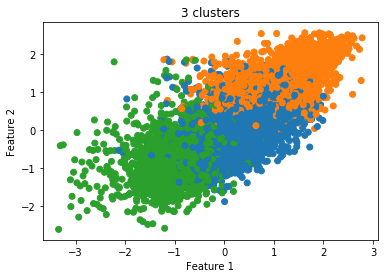

In [11]:
# plot the trainig data
P = clf.predict(train)
# Generate scatter plot for training data
colors = list(map(lambda x: 'C%d' % (x), P))
plt.scatter(train[:,0], train[:,1], c=colors, marker="o", picker=True)
plt.title('%d clusters' % (n_kclusters))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

[0 2 2 ... 2 1 2]


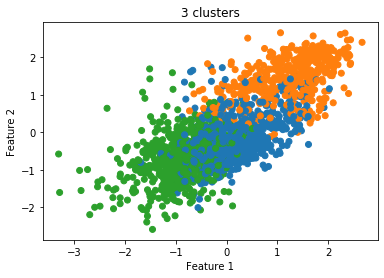

In [12]:
# plot the test data
P = clf.predict(test)
print(P)
# Generate scatter plot for training data
colors = list(map(lambda x: 'C%d' % (x), P))
plt.scatter(test[:,0], test[:,1], c=colors, marker="o", picker=True)
plt.title('%d clusters' % (n_kclusters))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercise 9

Using the above code (copy & paste below) plot the distributions in exercise 4, 5, 6 (note that in data, train and test, the columns are numbered, not named). Plot for the *test* data.

In [7]:
# student work here




NameError: name 'clf' is not defined

### Exercise 10

Vary the test data fraction where we split the sample (test_size=0.25). Try 99% and 1% of the data for testing. do you notice something? Does it matter much how the test/training samples are split? (return to 25% for Exercise 11). 

*student answer here*

### Exercise 11

Vary the number of clusters given to the K-means clustering. Using the three test sample distributions (Exercise 9), what seems to you a good number of clusters? 

*student answer here*

### The Elbow Method

adapted from: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

Although k-means worked well on this dataset, it is important to reiterate that a drawback of k-means is that we have to specify the number of clusters, k, before we know what the optimal k is. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster Sum of Squared Errors (SSE, or “distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k:

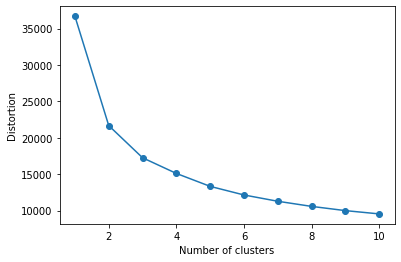

In [141]:
distortions = []
for i in range(1, 11):
    km = cluster.KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=42
    )
    km.fit(data)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
    

### Exercise 12

Turner et al. (2018) note that:
*"We find that the local galaxy population natively splits into 2, 3, 5 and a maximum of 6 sub-populations, with each corresponding to a distinct ongoing evolutionary mechanism."  

What is your verdict based on the elbow plot? Do you agree with the authors? Does this differ from your estimation in Exercise 11? 


*Student answer here*

### K-means Clustering 

* When your dataset has more clusters of data than the number of clusters you configure. For obvious reasons, K-means clustering will then fail. The fact that the user must configure the number of clusters is one possible point of failure as well. Always look closely at your dataset before you apply K-means, is the advice!
* Non-isotropic clusters, i.e., equally wide and equally high. If they’re not (and they are not in this real data), K-means will detect halves of clusters, or merge them together.
* If clusters aren’t convex, or truly separable. In those cases, the algorithm might get confused.
* Finally, if your dimensionality is too high. In the scenario above, we have a dimensionality of 5, but the more dimensions you add, the more time it will take for clustering to complete. This is due to the nature of the euclidian distance that is computed for inertia. Hence, you’ll have to apply dimensionality reduction first – with techniques like Principal Components Analysis (PCA), for example.

